In [8]:
import pandas as pd
data=pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
!pip install pycaret-nightly

  Using cached pyod-0.9.4-py3-none-any.whl
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached spacy-2.3.7-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached mlflow-1.20.2-py3-none-any.whl (14.6 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached lightgbm-3.3.0-py3-none-win_amd64.whl (1.0 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached smart_op

In [1]:
from pycaret.regression import *

Matplotlib is building the font cache; this may take a moment.


In [33]:
s=setup(data, target='charges',session_id=123,log_experiment=True)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(999, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(699, 14)"


In [34]:
get_config('X_train').columns

Index(['age', 'bmi', 'sex_female', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [35]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2770.1382,24040059.2793,4809.2404,0.8328,0.4227,0.2985,0.0600
lightgbm,Light Gradient Boosting Machine,3081.6466,26557464.4184,5058.8399,0.8161,0.5425,0.3660,0.0370
rf,Random Forest Regressor,2976.6768,27666949.4392,5179.9169,0.8079,0.4848,0.3488,0.2150
ada,AdaBoost Regressor,4148.8436,28325594.9669,5270.9514,0.8034,0.5927,0.6590,0.0250
et,Extra Trees Regressor,2931.4736,30339633.0071,5424.6949,0.7900,0.4838,0.3226,0.1750
ridge,Ridge Regression,4414.4973,39253305.0000,6236.1088,0.7316,0.5954,0.4546,0.0120
br,Bayesian Ridge,4411.4318,39256313.3621,6236.4177,0.7315,0.5973,0.4541,0.0140
lr,Linear Regression,4400.0849,39278263.2000,6238.4316,0.7314,0.6102,0.4522,0.0240
lasso,Lasso Regression,4398.9517,39271129.4000,6237.8486,0.7314,0.6073,0.4520,0.0120
llar,Lasso Least Angle Regression,4391.5197,39271823.0556,6237.7832,0.7314,0.5892,0.4505,0.0140


In [36]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
pred_holdout=predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2274.1932,15034894.1190,3877.4855,0.8839,0.3843,0.2841


In [14]:
pred_holdout.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,61.0,22.040001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13616.358398,13848.588398
1,27.0,36.080002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,37133.898438,39804.700208
2,18.0,35.625000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2211.130859,6243.023310
3,19.0,20.700001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1242.816040,901.226985
4,54.0,31.900000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27322.734375,14438.958152


In [15]:
data2=pd.read_csv('insurance_data.csv')
data2.head()

,age,sex,bmi,children,smoker,region
0,36,female,26.885,0,no,northwest
1,30,male,22.990,2,yes,northwest
2,24,male,32.700,0,yes,southwest
3,24,male,25.800,0,no,southwest
4,48,male,29.600,0,no,southwest


In [16]:
best_final=finalize_model(best)

In [17]:
predictions=predict_model(best_final, data=data2)
predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,36,female,26.885,0,no,northwest,5969.977928
1,30,male,22.990,2,yes,northwest,19254.785971
2,24,male,32.700,0,yes,southwest,35389.478511
3,24,male,25.800,0,no,southwest,3608.228096
4,48,male,29.600,0,no,southwest,8865.318890


In [18]:
save_model(best_final, 'insurance-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [27]:
dt=create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3264.5828,46444091.7984,6814.9902,0.7142,0.5317,0.4076
1,3127.1524,39675699.2491,6298.8649,0.6881,0.6290,0.4464
2,4091.4964,58906370.9947,7675.0486,0.6643,0.4718,0.3043
3,3791.2652,54168447.7115,7359.9217,0.6094,0.5049,0.3482
4,3429.8192,54385498.2805,7374.6524,0.5370,0.6063,0.3099
5,3504.8292,50734183.0113,7122.7932,0.6651,0.5811,0.3649
6,2536.2042,35594572.5679,5966.1187,0.7492,0.5031,0.4236
7,2876.1174,39461160.2105,6281.8119,0.7038,0.5626,0.5378
8,4809.3580,74937112.6211,8656.6225,0.5278,0.6296,0.3845
9,2586.3090,29598006.2286,5440.4050,0.8218,0.4129,0.2333


In [28]:
tuned_gbr=tune_model(dt,search_library='optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3438.8696,36807660.7390,6066.9317,0.7735,0.4757,0.3847
1,3051.0762,24527175.3003,4952.4918,0.8072,0.4699,0.3411
2,3018.1726,25613714.0216,5060.9993,0.8540,0.3801,0.2713
3,2891.4436,27313336.8236,5226.2163,0.8030,0.3581,0.2359
4,3507.9268,37954598.8924,6160.7304,0.6769,0.5368,0.3405
5,3217.5829,27158088.8897,5211.3423,0.8207,0.5119,0.3848
6,2107.7963,12497288.3708,3535.1504,0.9120,0.3727,0.3200
7,2276.7595,13973815.9945,3738.1568,0.8951,0.3611,0.3197
8,3167.9811,29926217.4084,5470.4860,0.8114,0.4547,0.2325
9,2402.2987,10740395.6603,3277.2543,0.9353,0.3277,0.2711


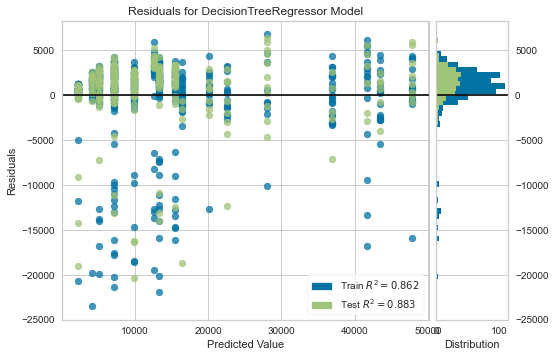

In [29]:
plot_model(tuned_gbr)